# Reproducing Figure 1 from "A Scale-Dependent Measure of System Dimensionality"

## Introduction

Complex systems, such as the brain neural system, are often characterized by a number of latent variables which is known as the dimensionality of a system. The correlation dimension and participation ratio quanitfy the dimensionality of such complex and dynamic systems locally and globally as can be observed by the executing the script below.

This script allows you to reproduce the results shown in figure 1 of the AccelNet paper on "A Scale-dependent Measure of System Dimensionality."

Please note that we have created a separate .py file consisting of the functions which are used throughout the code.

<div>
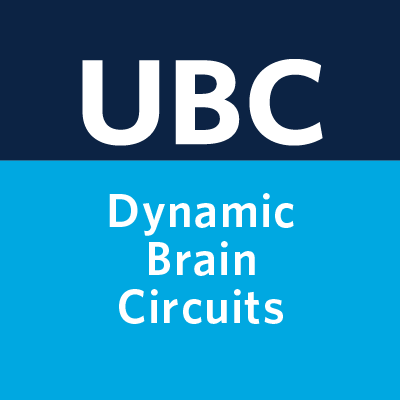
</div>

<div>
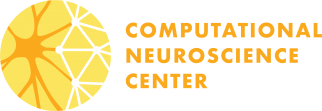
</div>

The following code segment imports the required packages in order to be able to run the code and reproduce the figures. Please note that the import accelnetfunctions line allows you to import and make use of critical functions to reproduce the images shown in figure 1 of the paper.

In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sklm
import matplotlib as mpl
mpl.rc('image', cmap='Paired')
import scipy.stats as stats
from scipy.special import zeta as zeta
#import tensorflow as tf
from sklearn.decomposition import PCA
import random
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = cm = plt.get_cmap('Paired')
cNorm  = colors.Normalize(vmin=0, vmax=12)
cMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

from matplotlib.colors import ListedColormap


import accelnetfunctions

The following code segment enables you to graph the Lorenz attractor without considering the noise levels. Please note that the preprint uses 10,000 points which you may or may not be able to run the following code with depending on the tool you use (as documented below). The segment below performs analysis on the spiral.

In [3]:
#N_points = 10000 #used in the preprint
#N_points = 10000 #tested on standard google colab
#N_points = 1000 #enough for a quick test
N_points = 5000 #works on syzygy.ca
x = accelnetfunctions.dataset_lorenz(N_points)
dists_matrix = sklm.pairwise_distances(x, n_jobs = -1)
dists = dists_matrix[np.triu_indices_from(dists_matrix, k=1)]
dists = dists[dists > 0]

The segment below produces a plot of the Lorenz attractor without noise.

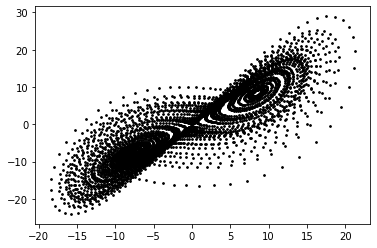

In [6]:
fig = plt.figure()
N_points = 100000 #used in preprint and works on syzygy.ca
plt.scatter(x[:N_points,0], x[:N_points,1], s=3, c='black', marker='o', rasterized=True)
plt.savefig('SpiralExampleNoNoise.pdf')
plt.savefig('SpiralExampleNoNoise.svg')
plt.show()

The following code segment below performs analysis of the spiral with consideration of local noise levels.

In [7]:
#N_points = 10000 #used in the preprint
#N_points = 10000 #tested on standard google colab
#N_points = 1000 #enough for a quick test
N_points = 5000 #works on syzygy.ca
x = accelnetfunctions.dataset_spiral(N_points, .1)
dists_matrix = sklm.pairwise_distances(x, n_jobs = -1)
dists = dists_matrix[np.triu_indices_from(dists_matrix, k=1)]
dists = dists[dists > 0]

The following code segment allows you to plot the spiral shape of the Lorenz attractor with consideration of local noise levels.

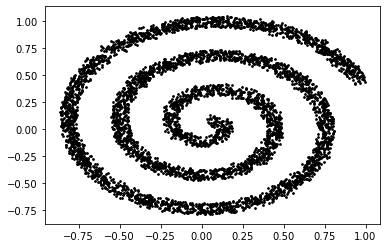

In [8]:
fig = plt.figure()
N_points = 500000
plt.scatter(x[:N_points,0], x[:N_points,1], s=3, c='black', marker='o', rasterized=True)
plt.savefig('NoisySpiralExample.pdf')
plt.savefig('NoisySpiralExample.svg')
plt.show()

The following code segment performs a correlation dimension analysis. The shape of the graph shows how the correlation dimension approaches 0 on a larger scale. The correlation dimension is determined from scaling the number of pair of data points with a separation of less than r as r approaches 0. The correlation dimension is accurate to use for small scales, but it approaches a value of 0 on larger scales.

0
1


/tmp/ipykernel_547/3872909535.py:3: RuntimeWarning: Mean of empty slice
  Dcorrmean = np.nanmean(Dcorr, axis = 0)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


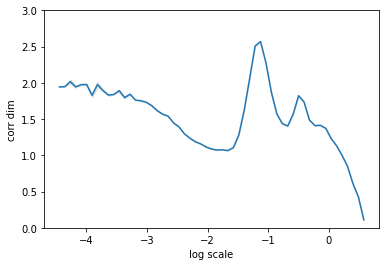

In [9]:
scales = accelnetfunctions.scalelog(dists, dists=True, Npoints=100)
Dcorr, logmidpoints = accelnetfunctions.boot_dim_corr(dists_matrix, scales, boot_pcg=0.8, N_bootstrap=2)
Dcorrmean = np.nanmean(Dcorr, axis = 0)
Dcorrstd = np.nanstd(Dcorr, axis = 0)
plt.plot(logmidpoints[:], Dcorrmean[:])
# plt.scatter(logmidpoints[:], Dcorrmean[:])
plt.fill_between(logmidpoints, Dcorrmean - Dcorrstd, Dcorrmean + Dcorrstd, color='gray', alpha=0.2)
plt.xlabel('log scale')
plt.ylabel('corr dim')
# plt.xlim([-5,1])
plt.ylim([0,3.])
plt.savefig('SpiralExampleCorrDim.pdf')
plt.savefig('SpiralExampleCorrDim.svg')
plt.show()

The following code segment performs a participation ratio analysis. The shape of the graph shows that the participation ratio remains an accurate representation of the dimensionality of the system as we look at larger scales. The participation ratio counts the effective dimensions of the spread of data by taking the ratio of the square of the first and second moments of the eigenvalue probability density function. The number of effective dimensions interpolates to the participation ratio globally; it intuitively makes sense in dynamic systems such as the Lorenz attractor (which is what we perform our analysis on in our execution of the code segment below). Therefore, we can use this value to increase our understanding of the dimensionality of complex neural systems.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


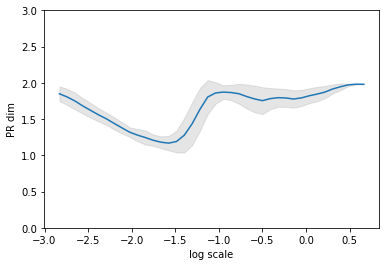

In [11]:
PRs, Scales = accelnetfunctions.boot_dim_pr(x, dists_matrix, scales, N_points=1000, N_maxiters=10000, C_minsize=50)
PRmean =  np.mean(PRs, axis=1)
plt.plot(np.log(scales), PRmean)
# iql = scipy.stats.iqr(PRs, axis=1, rng=(34,50), nan_policy='omit')
# iqu = scipy.stats.iqr(PRs, axis=1, rng=(50,66), nan_policy='omit')
# plt.fill_between(np.log(sigma_space), PRmean - iql, PRmean + iqu, color='gray', alpha=0.2)
PRste = np.nanstd(PRs, axis=1) #/ np.sqrt(N_points)
plt.fill_between(np.log(scales), PRmean - PRste, PRmean + PRste, color='gray', alpha=0.2)
plt.xlabel('log scale')
plt.ylabel('PR dim')
plt.ylim([0,3.])
plt.savefig('SpiralExamplePR.pdf')
plt.show()